<a href="https://colab.research.google.com/github/Magoluz2001/analise_exploratoria_copa_1930-2014/blob/main/analise_exploratoria_copa_1930_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das Bibliotecas

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Importação dos Dataframes

In [151]:
df_partidas = pd.read_csv("/content/drive/MyDrive/Análise Exploratória Copa 1930 - 2014/WorldCupMatches.csv")

In [152]:
df_copas = pd.read_csv("/content/drive/MyDrive/Análise Exploratória Copa 1930 - 2014/WorldCups.csv")

#Ordenação do dataframe por quantidade de gols marcados

In [153]:
df_copas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


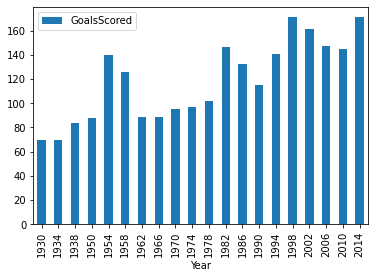

In [154]:
df_copas.plot.bar(x='Year', y='GoalsScored')

In [155]:
df_copas_sorted = df_copas.sort_values(by='GoalsScored')

In [156]:
df_copas.sort_values(by='Year')

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


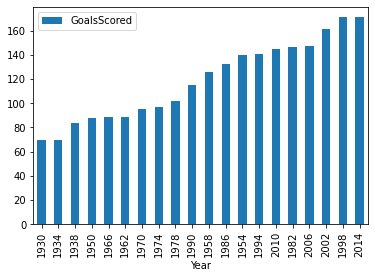

In [157]:
df_copas_sorted.plot.bar(x='Year', y='GoalsScored')

#Total de gols do brasil por copa

In [ ]:
df_partidas.info()
df_partidas['Home Team Name'].unique()

In [159]:
df_gols_brasil_home = df_partidas.loc[(df_partidas['Home Team Name'] == 'Brazil')==True]
df_gols_brasil_home = df_gols_brasil_home.groupby('Year')['Home Team Goals'].sum()

In [160]:
df_gols_brasil_away = df_partidas.loc[(df_partidas['Away Team Name'] == 'Brazil')==True]
df_gols_brasil_away = df_gols_brasil_away.groupby('Year')['Away Team Goals'].sum()

In [161]:
gols_brasil = (df_gols_brasil_home.add(df_gols_brasil_away, fill_value=0))

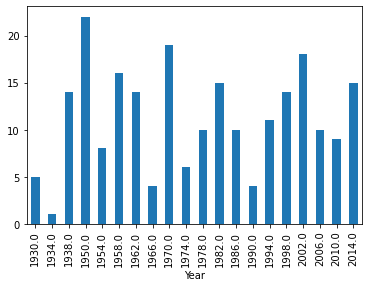

In [162]:
gols_brasil.plot.bar()

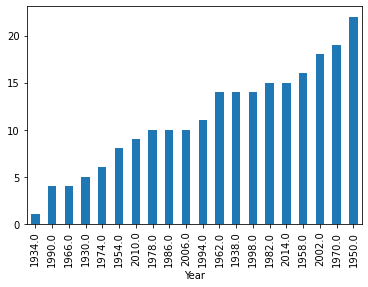

In [163]:
gols_brasil_sorted = gols_brasil.sort_values()
gols_brasil_sorted.plot.bar()

# Gols Por País

In [165]:
df_partidas_home = df_partidas.groupby('Home Team Name')['Home Team Goals'].sum()

In [166]:
df_partidas_away = df_partidas.groupby('Away Team Name')['Away Team Goals'].sum()

In [167]:
df_partidas_total = (df_partidas_home.add(df_partidas_away, fill_value=0))

In [177]:
df_partidas_total['Brazil']

225.0

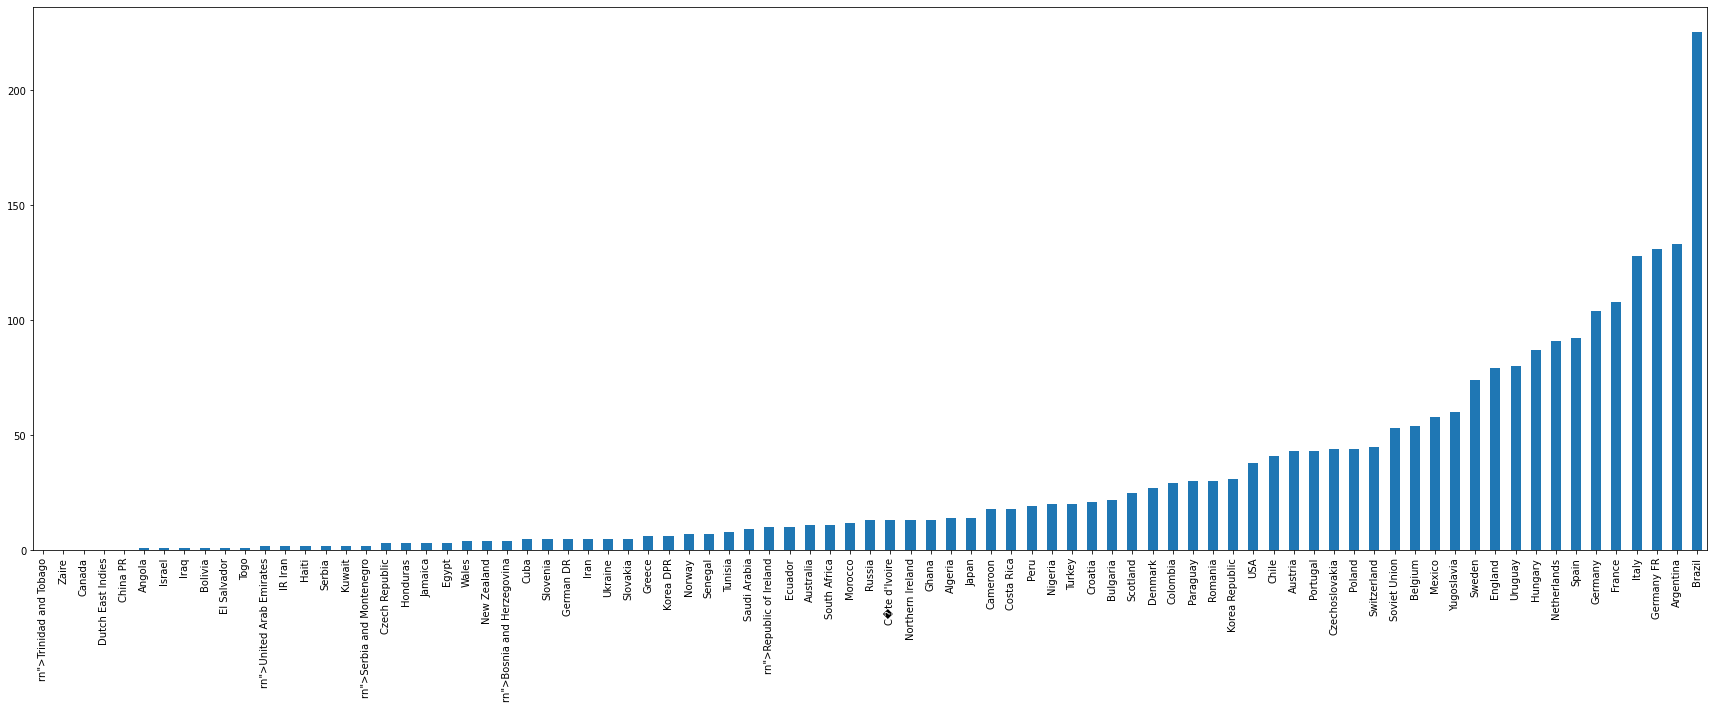

In [176]:
df_partidas_total_sorted = df_partidas_total.sort_values()
df_partidas_total_sorted.plot.bar(figsize=(30,10))